## Проект "Исследование по оттоку клиентов фитнес центра"


Задача — провести анализ и подготовить план действий по удержанию клиентов.


* Спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* Сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* Проанализировать основные признаки, наиболее сильно влияющие на отток;
* Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

### Данные

* `Churn` — факт оттока в текущем месяце;

Текущие поля в датасете:
Данные пользователя за предыдущий до проверки факта оттока месяц:

* `gender` — пол
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
* `Phone` — наличие контактного телефона
* `Age` — возраст
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах)

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
* `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах)
* `Group_visits` — факт посещения групповых занятий
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import math
warnings.simplefilter('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [3]:
%matplotlib inline

In [4]:
gym_churn = pd.read_csv('gym_churn.csv',index_col=False)

In [5]:
display(gym_churn)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


` в датасете 4000 строк и 14 колонок `

## 1. EDA

In [6]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


` Данные в целом равномерны, выбросы отсутствуют. 
Стандартные отклонения недалеки от средних значений. `

In [8]:
gym_churn.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

#### Приведем названия колонок к нижнему регистру

In [9]:
gym_churn.columns = gym_churn.columns.str.lower()

#### Проверим наличие пропусков в датасете

In [10]:
gym_churn.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

` Пропуски отсутствуют `

#### Проверим количество дубликатов

In [11]:
gym_churn.duplicated().sum()

0

` Явные дубликаты отсутствуют`

In [12]:
gym_churn['churn'].value_counts()

churn
0    2939
1    1061
Name: count, dtype: int64

` 1061 клиент попали в отток `

#### Сгруппируем датасет по группам клиентов и посмотрим средние значения по признакам

In [13]:
gym_churn.groupby('churn', as_index=False)\
.agg({'gender':'mean', 'near_location':'mean', 'partner':'mean', 
        'promo_friends':'mean', 'phone':'mean', 'contract_period':'mean', 
        'group_visits':'mean', 'age':'mean', 'avg_additional_charges_total':'mean', 
        'month_to_end_contract':'mean', 'lifetime':'mean','avg_class_frequency_total':'mean',
        'avg_class_frequency_current_month':'mean'})

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


` В таких признаках как gender, phone, near_location средние значения практически не отличаются. 
Сильную разницу в средних значениях можно отметить в признаках partner, promo_friends,contract_period, group_visits, 
avg_additional_charges_total, month_to_end_contract, lifetime,avg_class_frequency_total,avg_class_frequency_current_month `

#### Построим диаграмму распределения признаков по клиентам

In [14]:
gym_churn[['churn', 'gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']]\
.groupby(['churn', 'gender'], as_index = False)\
.agg({'near_location':'sum', 'partner':'sum', 'promo_friends':'sum', 'phone':'sum', 'group_visits':'sum'})

,churn,gender,near_location,partner,promo_friends,phone,group_visits
0,0,0,1255,782,511,1305,657
1,0,1,1311,788,528,1351,707
2,1,0,396,182,98,470,133
3,1,1,419,195,97,488,152


` Согласно распределения примерно одинаковое количество мужчин и женщин попали в отток - 396 и 419. 
Такая же ситуация и по остальным признакам - партнерская программа: 182 и 195 против 782 и 788 оставшихся мужчин и женщин.
По акции приведи друга - 98 и 97 мужчин и женщин попали в отток, что составляет всего около 15% от общего числа клиентов, 
пришедших по промо.
Также в отток попали 470 и 488 мужчин и женщин.
Распределение по полу в целом равномерное.
Можем сделать вывод, что отток не зависит от пола.`

#### Рассмотрим только булевые признаки

In [36]:
bool_signs = gym_churn[['churn', 'gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']]

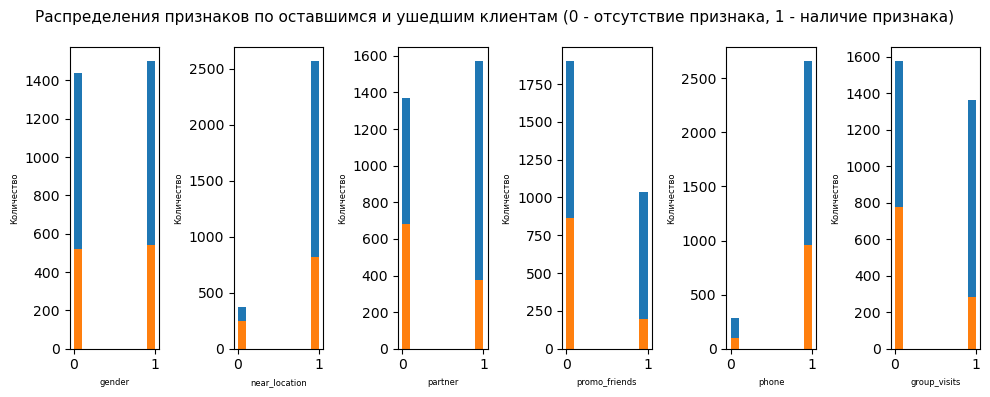

In [37]:
columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']

n_length = len(columns)
n_cols = 6
n_rows = math.ceil(n_length/n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 4 * n_rows))
fig.suptitle('Распределения признаков по оставшимся и ушедшим клиентам (0 - отсутствие признака, 1 - наличие признака)', fontsize=11)

axs = axs.flatten()

for i, column in enumerate(columns):
    #axs[i].bar(bool_signs['churn'], bool_signs[column])
    axs[i].hist(bool_signs[bool_signs['churn'] == 0][column])
    axs[i].hist(bool_signs[bool_signs['churn'] == 1][column])
    axs[i].set_xlabel(f'{column}', fontsize=6)
    axs[i].set_ylabel('Количество', fontsize=6)
    
for j in range(n_length, n_rows * n_cols):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

` Отток по между мужчинами и женщинами в целом равномерный. Посетители, которые живут рядом с клубом в отток попадают меньше, те кто живет в другом районе практически все попадают в отток.
Те, кто пришел в клую по партнерской программе, гораздо чаще продолжают ходить в клуб. 
Те, кто не воспользовался партнерской программе попадают в отток 50/50. 
Клиенты пришедшие по акции "приведи друга" гораздо реже попадают в отток, нежели клиенты не использовавшие эту акцию. 
Такие клиенты попадают в отток 50/50. 
Наличие телефона никак не помогает при удержании клиента. Клиенты, посещающие групповые занятия, гораздо реже попают в отток, в то время как клиенты, не посещающие групповые занятия, попадают в отток 50/50.
Подведем предварительный итог: клиенты, которые воспользовались какой-либо промо-акцией, партнерской программой или посещающие групповые занятия реже попадают в отток. То есть, эти признаки могли бы способствовать удержанию клиентов.` 

#### Рассмотрим другие признаки

In [42]:
other_signs = gym_churn[['churn','contract_period','age','month_to_end_contract','lifetime',
                        'avg_additional_charges_total','avg_class_frequency_total', 'avg_class_frequency_current_month']]

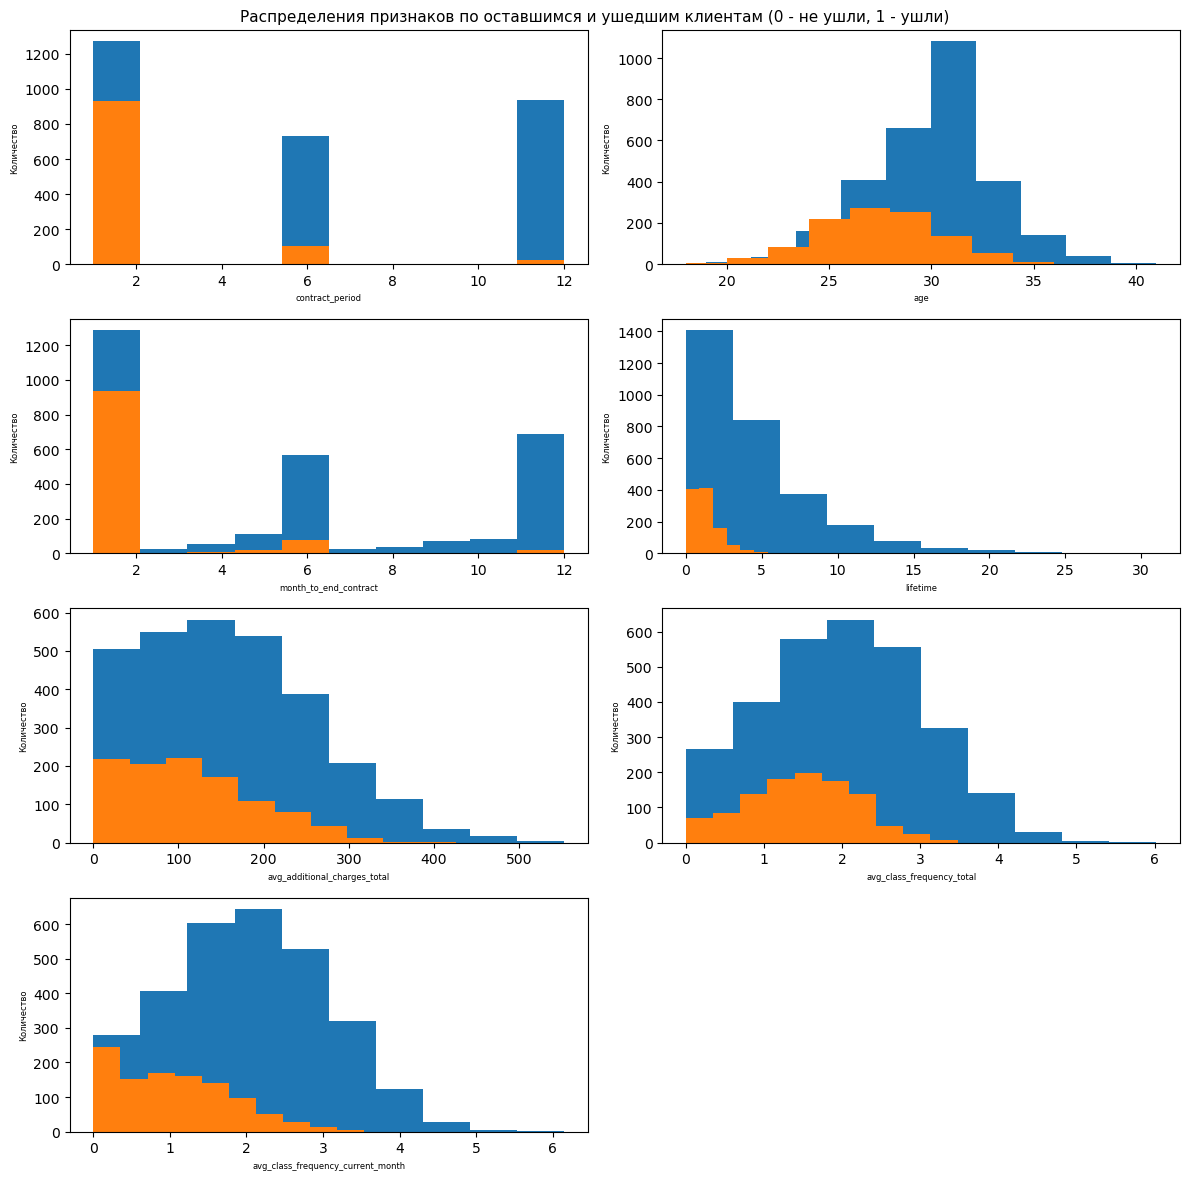

In [43]:
columns_2 = ['contract_period','age','month_to_end_contract','lifetime',
            'avg_additional_charges_total','avg_class_frequency_total', 'avg_class_frequency_current_month']

n_length = len(columns_2)
n_cols = 2
n_rows = math.ceil(n_length/n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 3 * n_rows))
fig.suptitle('Распределения признаков по оставшимся и ушедшим клиентам (0 - не ушли, 1 - ушли)', fontsize=11)

axs = axs.flatten()

for i, column in enumerate(columns_2):
    axs[i].hist(other_signs[other_signs['churn'] == 0][column])
    axs[i].hist(other_signs[other_signs['churn'] == 1][column])
    axs[i].set_xlabel(f'{column}', fontsize=6)
    axs[i].set_ylabel('Количество', fontsize=6)
    
for j in range(n_length, n_rows * n_cols):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

` Больше всего в отток попадают клиенты с коротким сроком контракта - 1 месяц. Гораздо реже клиенты с более долгим сроком - 6, 12 месяцев. Меньше всего по возрасту попадают клиенты страше 30 лет, больше всего клиенты между 25 и 30 годами. Клиенты, у которых приблежается срок окончания контракта, гораздо чаще других пападают в отток, чем те у кого до окончания контракта 6-12 месяцев. Время с момента первого обращения - клиенты либо попадают в отток сразу же (0-5 месяцев), либо не попадают. Хотя количество такие клиентов невысокое. Клиенты, пользующиеся другими услугами фитнес-центра (вне зависимости от суммы), могут попадать в отток. В основном клиенты, пользующиеся услугами на сумму от 0 - 300 руб могут попадать в отток. Клиенты с частотой посещений 0-2 раза в неделю также относятся к отточным клиентам. Если как-то увеличить количество посещений клиента в неделю как минимум до трех, вохможно сократить отток. На графике можно заметить, что количество клиентов посещающих спортзал 1-3 раза, практически одинаковое. Если рассматривать этот же показатель,но за предыдущий месяц, можем заметить аналогичную ситуацию. Те, кто чаще посещает спортзал, реже попадают в отток. ` 

#### Рассмотрим зависимость признаков по клиентам. Построим матрицу корреляции

In [44]:
corr_table = gym_churn.corr()
corr_table

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


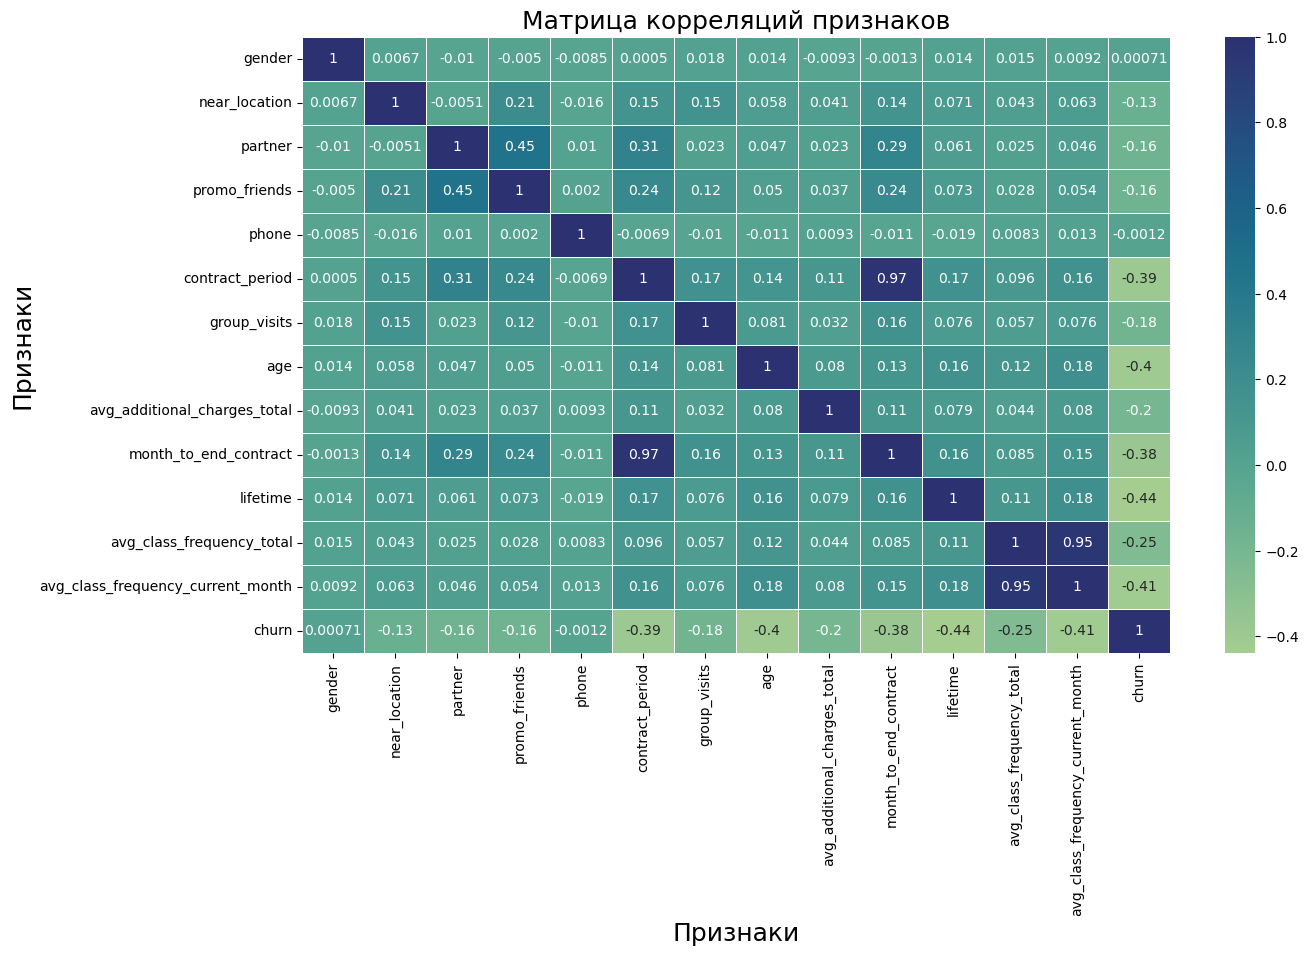

In [45]:
plt.figure(figsize=(14,8))
sns.heatmap(corr_table, annot=True, linewidth=.5, cmap="crest")
plt.title('Матрица корреляций признаков', fontsize = 18)
plt.xlabel('Признаки', fontsize = 18)
plt.ylabel('Признаки', fontsize = 18) 
plt.show()

`Самая сильная зависимость в данных между такими признаками как month_to_end_contract(количество месяцев до конца контракта) и contract_period(период контракта) - 0,97 и avg_class_frequency_current_month(средняя частота посещений в неделю за месяц) и avg_class_frequency_total(средняя частота посещений в неделю за все время) - 0,95. Корреляция между этими признаками и так понятна, частота посещений за месяц и за весь период высчитываются из схожих данных, как и период контракта и его остаток. По остальным признакам корреляция не очень сильная, либо вообще отсутствует. Например количество: lifetime/contract_period - всего 0,17, group_visits/month_to_end_contract - 0,16.`

## 2. Модель прогнозирования оттока пользователей

In [46]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

#### разделим данные на признаки (матрица X) и целевую переменную (y)

In [52]:
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']

# разделим модель на обучающую и валидационную выборку

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1, stratify=y)

# стандартизируем данные методом StandartScaler

scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [53]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=1)

# обучим модель
lr_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы

lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

In [54]:
# выведем все метрики для логической регрессии
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.91
	Recall: 0.84
	F1: 0.87
	ROC_AUC: 0.98


In [55]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 1)

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

In [56]:
# выведем все метрики для случайного леса
print_all_metrics(
    y_test, 
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.93
	Precision: 0.92
	Recall: 0.81
	F1: 0.86
	ROC_AUC: 0.97


` Сравним расчитанные метрики по моделям: логистическая регрессия и случайный лес. Accuracy логичестической регрессии 0,94, а случайного леса - 0,93. Precision у логистической регрессии - 0,91, а у случайного леса 0,92. Recall у логистической регрессии - 0,84, а у случайного леса 0,81. У логичестической модели F- мера 0,87, а у случайного леса - 0,96. ROC_AUC логистической регрессии 0,98, а случайного леса - 0,97. В сравнении по большинству показателей модель логистической регрессии показала себя немного лучше, но по итоговым метрикам не сильно различается. Обе модели хорошо сработали. `

## 3. Кластеризация пользователей

#### Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков. Построим дендрограмму. 

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

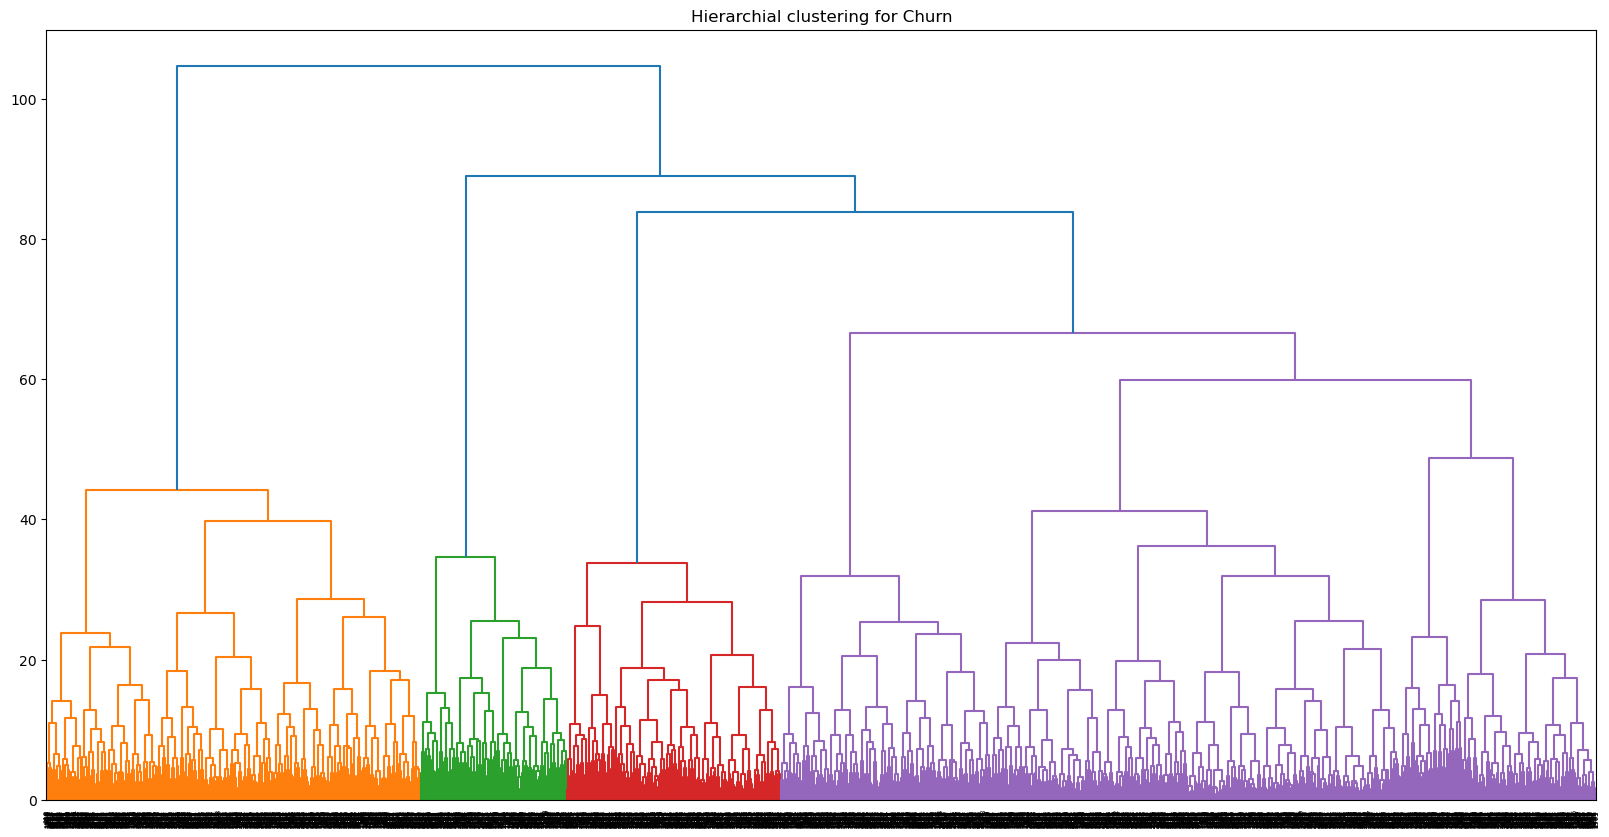

In [59]:
#Стандартизация данных
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков. Построим дендрограмму. 
linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(20, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for Churn')
plt.show() 

` Визуально можно выделить 4 кластера. Два маленьких и самый большой из 4-х - фиолетовый.` 

In [60]:
# Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. 
# Возьмем число кластеров принять n=5
kmeans = KMeans(n_clusters=5, random_state=0) 
clusters = kmeans.fit_predict(X_sc)
gym_churn['cluster'] = clusters

# Найдем средние значения признаков для кластеров
cluster_means = gym_churn.drop('churn', axis=1).groupby('cluster').mean().T
display(cluster_means)

cluster,0,1,2,3,4
gender,0.495413,0.585938,0.484424,0.500534,0.488267
near_location,0.000000,0.971354,0.998442,0.945571,1.000000
partner,0.466055,0.260417,0.822430,0.741729,0.243682
promo_friends,0.077064,0.092448,1.000000,0.486660,0.020758
phone,0.915596,0.903646,0.900312,0.899680,0.902527
contract_period,2.227523,2.813802,3.155763,11.871932,1.985560
group_visits,0.214679,0.477865,0.454829,0.552828,0.320397
age,28.484404,30.144531,29.218069,29.933831,28.209386
avg_additional_charges_total,133.862709,162.010722,141.203442,164.763165,131.191160
month_to_end_contract,2.091743,2.589844,2.919003,10.865528,1.901625


` Кластер "0":
Значение по признаку "near_location" - 0, значит что рядом с залом никто не живет. 
Групповые визиты также близки к нулю - всего 0,21. 
"month_to_end_contract" - до окончания около двух месяцев. И "срок жизни договора" или "lifetime"  - также 2 месяца. 
Также можно наблюдать низкую посещаемость - менее 2-х посещений в неделю (как в целом, так и за прошлую неделю)
Портрет: Клиенты, которые недавно пришли, далеко живут, редко ходят и уже скоро уйдут. Высокий риск оттока.
Рекомендация: Срочно запустить для них программу удержания (реферальная программа, скидка на продление)` 

` Кластер "1":
"avg_class_frequency_total" и "avg_class_frequency_current_month" - Самая высокая посещаемость, почти 3 раза в неделю!
Высокие траты  - 162. Почти все клиенты живут рядом с залом - среднее значение признака 0,97. Посещаемость групповых занятий - 0,48. Долгое время являются клиентами клуба - 5.13.
Портрет: Лояльные, вовлеченные и прибыльные клиенты. 
Рекомендация: Поощрять лояльность, предлагать премиум-услуги.` 

` Кластер "2":
Абсолютный максимум по акции "promo_friends" - 1, все клиенты пришли по акции. Также практически все клиенты живут рядом с залом - 0,99. Очень высокий показатель по партнерской программе - 0,82. Имеют длинный договор - 3,70. Траты средние - 141,20.
Портрет: Социально активные клиенты, которые приходят с друзьями и сами приводят их.
Рекомендация: Вовлекать в партнерские и реферальные программы. Давать им эксклюзивные предложения, которыми они захотят поделиться.` 

` Кластер "3":
Период контракта 11,87 и большой оставшийся срок "month_to_end_contract" - 10.86. Самые высокие траты среди всех кластеров - "avg_additional_charges_total" почти 165. Самая высокая посещаемость групповых занятий - 0,55.
Портрет: Клиенты, которые купили самую длительную и дорогую подписку Максимально интегрированы в спортивную жизнь
Рекомендация: поддержка интереса, предложение новых активностей в спортзале.` 

` Кластер "4":
Самая низкая посещаемость как в целом, так и за последнюю неделю - 1,27 и 1,03. Живут рядом но не ходят - near_location равен "1". Самые короткие договоры - 1,98! Низкие допольнительные траты - 131. Низкая активная посещаемость по promo_friends - 0,02.
Портрет: Клиенты, которые купили самый дешевый вариант "чтобы был", но не используют его.
Рекомендация: Стимулировать посещаемость (челленджи, напоминания, "приведи друга раз в месяц - получи скидку"). Показать ценность регулярных занятий.` 

#### Постройте распределения признаков для кластеров

In [66]:
# Для каждого полученного кластера посчитаем долю оттока (методом groupby())
churn_by_cluster = gym_churn\
.query('churn==1')\
.groupby('cluster', as_index = False)\
.agg({'churn':'count'})
churn_by_cluster

,cluster,churn
0,0,245
1,1,53
2,2,159
3,3,21
4,4,583


`Кластер №4 самый многочисленный, количество клиентов составляет 583 клиента. Самые малочисленные №1 и №3, которые относятся к одним из самых постоянных клиентов. Общий оттток по ним составляет 74 клиента ` 

In [67]:
churn_by_cluster['ratio'] = churn_by_cluster['churn']/gym_churn.query('churn==1')['churn'].count()
churn_by_cluster

,cluster,churn,ratio
0,0,245,0.230914
1,1,53,0.049953
2,2,159,0.149859
3,3,21,0.019793
4,4,583,0.549482


`От общего числа клиентов, попавших в отток, доля клиентов из кластепа 4 составляет почти 55%. По кластеру 0 - 23%`

<Axes: title={'center': 'Доля оттока по кластерам'}, xlabel='Количество', ylabel='Кластеры'>

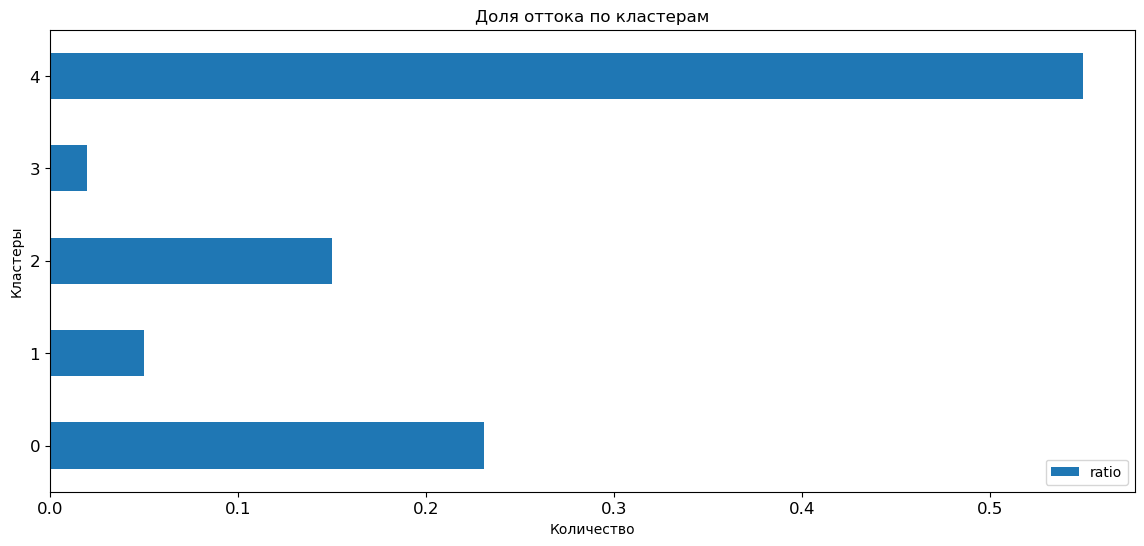

In [69]:
churn_by_cluster.plot(x = 'cluster', y = 'ratio', kind = 'barh', figsize = (14,6), title='Доля оттока по кластерам', \
fontsize=12, xlabel='Количество', ylabel= 'Кластеры')

`Также доли кластеров от общего числа оттока можно увидеть на графике `

## 4.Выводы и рекомендации

##### 1. Обзор данных
Проанализирован датасет: 4000 строк, 14 столбцов.

Качество данных высокое: пропуски и явные дубликаты отсутствуют, выбросы не обнаружены.

Целевая переменная: отток составил 1061 клиент (26.5% от общего числа).

##### 2. Ключевые признаки, влияющие на отток
Не влияют: пол клиента (gender), наличие телефона (phone).

Сильно влияют:

Маркетинговые активности: Клиенты, пришедшие по партнерской программе (partner) или акции "Приведи друга" (promo_friends), уходят значительно реже.

Посещения: Клиенты, посещающие групповые занятия (group_visits), менее склонны к оттоку.

Контракт: Клиенты с коротким сроком контракта (contract_period) и те, у кого он скоро заканчивается (month_to_end_contract), уходят чаще.

Активность: Низкая частота посещений (avg_class_frequency_total и avg_class_frequency_current_month) — ключевой индикатор риска оттока.

##### 3. Анализ моделей
Сравнивались две модели: Логистическая регрессия и Случайный лес.

Результаты: Обе модели показали отличное и сравнимое качество (Accuracy ~0.93-0.94, ROC-AUC ~0.97-0.98).

Вывод: Модели успешно предсказывают отток и могут быть использованы для выявления клиентов группы риска.

##### 4. Сегментация клиентов и рекомендации
Кластеризация выявила 5 четких сегментов с уникальными профилями риска:

Кластер	Портрет клиента	Риск оттока	Рекомендации
0	Новые и далекие: Не живут рядом, низкая посещаемость, контракт скоро заканчивается.	Высокий (23% оттока)	Срочная программа лояльности: скидки на продление, реферальная программа.
1	Лояльные энтузиасты: Живут рядом, высокая посещаемость и траты, долгосрочные клиенты.	Низкий	Поощрение лояльности, предложение премиум-услуг.
2	Социальные активисты: Пришли по акции "друг", сами приводят друзей, живут рядом.	Низкий	Вовлечение в партнерские программы, эксклюзивные предложения "делись с другом".
3	Премиум-клиенты: Максимальные траты, длительный контракт, высокая посещаемость групповых занятий.	Низкий	Поддержание интереса: персональные тренировки, новые активности.
4	Пассивные ("купили и забыли")	Критический (55% оттока)	Стимуляция посещаемости: челленджи, напоминания, разовые акции.
Живут рядом, но имеют самую низкую посещаемость и короткие контракты.		


Основной отток сконцентрирован в кластере 4 («Пассивные клиенты»). Для борьбы с оттоком необходимо сфокусироваться на повышении вовлеченности (посещаемости) через таргетированные маркетинговые акции и программы лояльности, особенно для клиентов с короткими контрактами и низкой активностью.